In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset_band_gap.csv')
dataset.head()

,Unnamed: 0,material_id,formula,nsites,space_group,volume,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,structure,minimum CN_VoronoiNN,maximum CN_VoronoiNN,range CN_VoronoiNN,mean CN_VoronoiNN,avg_dev CN_VoronoiNN,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,mean ordering parameter shell 1,mean ordering parameter shell 2,mean ordering parameter shell 3,max packing efficiency,minimum local difference in Number,maximum local difference in Number,range local difference in Number,mean local difference in Number,avg_dev local difference in Number,minimum local difference in MendeleevNumber,maximum local difference in MendeleevNumber,range local difference in MendeleevNumber,...,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,0,mp-441,Rb2Te,3,225,159.501208,1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False,Full Formula (Rb2 Te1)\nReduced Formula: Rb2Te...,8.000000,9.971809,1.971809e+00,9.314539,8.763594e-01,3.725711e-02,1.027943,0.944114,4.574309e-08,0.069488,6.948827e-02,0.046326,3.088368e-02,1.041667e-01,0.389073,0.079838,0.053132,0.510131,6.390728,15.000000,8.609272e+00,9.260485,3.826343e+00,36.640171,86.000,4.935983e+01,...,0.0,0.0,0.0,1.0,2.0,1.0,1.333333,0.444444,1.0,34.763333,90.722500,55.959167,72.069444,24.870741,90.72250,0.0,0.464,0.464,0.154667,0.206222,0.000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0,0.222222,0.222222,0.555556,0.0,True,0.336084,0.074685
1,1,mp-22881,CdCl2,3,166,84.298097,3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,Full Formula (Cd1 Cl2)\nReduced Formula: CdCl2...,6.005276,10.884861,4.879585e+00,9.258333,2.168704e+00,1.112596e-01,1.083445,0.833111,7.214204e-04,0.180224,1.795025e-01,0.120390,7.977887e-02,2.055257e-01,0.334561,0.092067,0.078179,0.359239,12.080936,31.000000,1.891906e+01,18.387291,8.408473e+00,9.352983,24.000,1.464702e+01,...,0.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.444444,1.0,19.495000,24.497500,5.002500,22.830000,2.223333,24.49750,0.0,2.493,2.493,1.662000,1.108000,2.493,0.0,0.00000,0.00000,0.000000,0.000000,0.0,64.0,194.0,130.0,107.333333,57.777778,64.0,0.230769,0.384615,0.384615,0.0,True,0.417383,0.092752
2,2,mp-28013,MnI2,3,164,108.335875,1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False,Full Formula (Mn1 I2)\nReduced Formula: MnI2\n...,6.000000,10.784332,4.784332e+00,9.189554,2.126370e+00,1.109774e-01,1.083233,0.833534,4.476379e-07,0.178562,1.785616e-01,0.119042,7.93

In [ ]:
dataset["compound possible"] = dataset["compound possible"]*1
dataset.head()

,Unnamed: 0,material_id,formula,nsites,space_group,volume,band_gap,e_electronic,e_total,n,poly_electronic,poly_total,pot_ferroelectric,structure,minimum CN_VoronoiNN,maximum CN_VoronoiNN,range CN_VoronoiNN,mean CN_VoronoiNN,avg_dev CN_VoronoiNN,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,mean ordering parameter shell 1,mean ordering parameter shell 2,mean ordering parameter shell 3,max packing efficiency,minimum local difference in Number,maximum local difference in Number,range local difference in Number,mean local difference in Number,avg_dev local difference in Number,minimum local difference in MendeleevNumber,maximum local difference in MendeleevNumber,range local difference in MendeleevNumber,...,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,0,mp-441,Rb2Te,3,225,159.501208,1.88,"[[3.44115795, -3.097e-05, -6.276e-05], [-2.837...","[[6.23414745, -0.00035252, -9.796e-05], [-0.00...",1.86,3.44,6.23,False,Full Formula (Rb2 Te1)\nReduced Formula: Rb2Te...,8.000000,9.971809,1.971809e+00,9.314539,8.763594e-01,3.725711e-02,1.027943,0.944114,4.574309e-08,0.069488,6.948827e-02,0.046326,3.088368e-02,1.041667e-01,0.389073,0.079838,0.053132,0.510131,6.390728,15.000000,8.609272e+00,9.260485,3.826343e+00,36.640171,86.000,4.935983e+01,...,0.0,0.0,0.0,1.0,2.0,1.0,1.333333,0.444444,1.0,34.763333,90.722500,55.959167,72.069444,24.870741,90.72250,0.0,0.464,0.464,0.154667,0.206222,0.000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0,0.222222,0.222222,0.555556,0.0,1,0.336084,0.074685
1,1,mp-22881,CdCl2,3,166,84.298097,3.52,"[[3.34688382, -0.04498543, -0.22379197], [-0.0...","[[7.97018673, -0.29423886, -1.463590159999999]...",1.78,3.16,6.73,False,Full Formula (Cd1 Cl2)\nReduced Formula: CdCl2...,6.005276,10.884861,4.879585e+00,9.258333,2.168704e+00,1.112596e-01,1.083445,0.833111,7.214204e-04,0.180224,1.795025e-01,0.120390,7.977887e-02,2.055257e-01,0.334561,0.092067,0.078179,0.359239,12.080936,31.000000,1.891906e+01,18.387291,8.408473e+00,9.352983,24.000,1.464702e+01,...,0.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.444444,1.0,19.495000,24.497500,5.002500,22.830000,2.223333,24.49750,0.0,2.493,2.493,1.662000,1.108000,2.493,0.0,0.00000,0.00000,0.000000,0.000000,0.0,64.0,194.0,130.0,107.333333,57.777778,64.0,0.230769,0.384615,0.384615,0.0,1,0.417383,0.092752
2,2,mp-28013,MnI2,3,164,108.335875,1.17,"[[5.5430849, -5.28e-06, -2.5030000000000003e-0...","[[13.80606079, 0.0006911900000000001, 9.655e-0...",2.23,4.97,10.64,False,Full Formula (Mn1 I2)\nReduced Formula: MnI2\n...,6.000000,10.784332,4.784332e+00,9.189554,2.126370e+00,1.109774e-01,1.083233,0.833534,4.476379e-07,0.178562,1.785616e-01,0.119042,7.936071e-

In [ ]:
dataset.shape

(1056, 287)

In [ ]:
len(dataset[dataset['minimum CN_VoronoiNN'] == ''])

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'material_id', 'formula', 'nsites', 'space_group',
       'volume', 'band_gap', 'e_electronic', 'e_total', 'n',
       ...
       'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'compound possible', 'max ionic char',
       'avg ionic char'],
      dtype='object', length=287)

In [ ]:
table = dataset.describe()
table = table.transpose()
print(table)

                           count        mean  ...         75%         max
nsites                    1056.0    7.530303  ...    9.000000   20.000000
space_group               1056.0  142.970644  ...  194.000000  229.000000
volume                    1056.0  166.420376  ...  212.106405  597.341134
band_gap                  1056.0    2.119432  ...    2.885000    8.320000
poly_electronic           1056.0    7.248049  ...    7.440000  256.840000
...                          ...         ...  ...         ...         ...
frac p valence electrons  1056.0    0.341590  ...    0.500000    0.714286
frac d valence electrons  1056.0    0.319690  ...    0.555556    0.789474
frac f valence electrons  1056.0    0.054740  ...    0.000000    0.538462
max ionic char            1056.0    0.478882  ...    0.708321    0.921450
avg ionic char            1056.0    0.097441  ...    0.139999    0.229405

[278 rows x 8 columns]


In [ ]:
dataset = dataset.apply (pd.to_numeric, errors='coerce')
dataset = dataset.dropna()
dataset

,nsites,space_group,volume,band_gap,poly_electronic,poly_total,minimum CN_VoronoiNN,maximum CN_VoronoiNN,range CN_VoronoiNN,mean CN_VoronoiNN,avg_dev CN_VoronoiNN,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,mean ordering parameter shell 1,mean ordering parameter shell 2,mean ordering parameter shell 3,max packing efficiency,minimum local difference in Number,maximum local difference in Number,range local difference in Number,mean local difference in Number,avg_dev local difference in Number,minimum local difference in MendeleevNumber,maximum local difference in MendeleevNumber,range local difference in MendeleevNumber,mean local difference in MendeleevNumber,avg_dev local difference in MendeleevNumber,minimum local difference in AtomicWeight,maximum local difference in AtomicWeight,range local difference in AtomicWeight,mean local difference in AtomicWeight,avg_dev local difference in AtomicWeight,minimum local difference in MeltingT,...,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,3,225,159.501208,1.88,3.44,6.23,8.000000,9.971809,1.971809e+00,9.314539,8.763594e-01,3.725711e-02,1.027943,0.944114,4.574309e-08,0.069488,6.948827e-02,0.046326,3.088368e-02,1.041667e-01,0.389073,0.079838,0.053132,0.510131,6.390728,15.000000,8.609272e+00,9.260485,3.826343e+00,36.640171,86.000000,4.935983e+01,53.093448,2.193770e+01,17.950361,42.132200,2.418184e+01,26.010974,1.074748e+01,174.765097,...,0.0,0.0,0.0,1.0,2.0,1.0,1.333333,0.444444,1.0,34.763333,90.722500,55.959167,72.069444,24.870741,90.722500,0.0,0.464,0.464,0.154667,0.206222,0.000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0,0.222222,0.222222,0.555556,0.000000,True,0.336084,0.074685
1,3,166,84.298097,3.52,3.16,6.73,6.005276,10.884861,4.879585e+00,9.258333,2.168704e+00,1.112596e-01,1.083445,0.833111,7.214204e-04,0.180224,1.795025e-01,0.120390,7.977887e-02,2.055257e-01,0.334561,0.092067,0.078179,0.359239,12.080936,31.000000,1.891906e+01,18.387291,8.408473e+00,9.352983,24.000000,1.464702e+01,14.235322,6.509785e+00,29.991118,76.958000,4.696688e+01,45.646746,2.087417e+01,164.698230,...,0.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.444444,1.0,19.495000,24.497500,5.002500,22.830000,2.223333,24.497500,0.0,2.493,2.493,1.662000,1.108000,2.493,0.0,0.00000,0.00000,0.000000,0.000000,0.0,64.0,194.0,130.0,107.333333,57.777778,64.0,0.230769,0.384615,0.384615,0.000000,True,0.417383,0.092752
2,3,164,108.335875,1.17,4.97,10.64,6.000000,10.784332,4.784332e+00,9.189554,2.126370e+00,1.109774e-01,1.083233,0.833534,4.476379e-07,0.178562,1.785616e-01,0.119042,7.936071e-02,2.074588e-01,0.330972,0.093536,0.078672,0.360542,10.844811,28.000000,1.715519e+01,16.563207,7.62

In [1]:
unwanted =['Unnamed: 0', 'material_id', 'formula', 'structure',
           'pot_ferroelectric','e_electronic', 'e_total', 'n']
dataset = dataset.drop(unwanted, axis=1)
#dataset.head()

In [ ]:
X = dataset.drop('band_gap', axis=1)
target = dataset['band_gap']

# Fetaure Elimination

Melakukan eliminasi fitur dengan Rcursive Feature Elimination (RFE). Pada tahap ini akan diselksi fitur-fitur yang bisa menghasilkan model terbaik pada Moddel Extra Tree Regressor

In [ ]:
%%time
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np 
 
model = ExtraTreesRegressor()
rfecv = RFECV(estimator=model, step=1, cv=(10), scoring='r2')
 
#rfc = ExtraTreesRegressor(n_estimators=100, random_state=0)
#rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='neg_mean_squared_error')
rfecv.fit(X,np.hstack(target.values))

CPU times: user 2h 11min 30s, sys: 3.51 s, total: 2h 11min 34s
Wall time: 2h 11min 41s


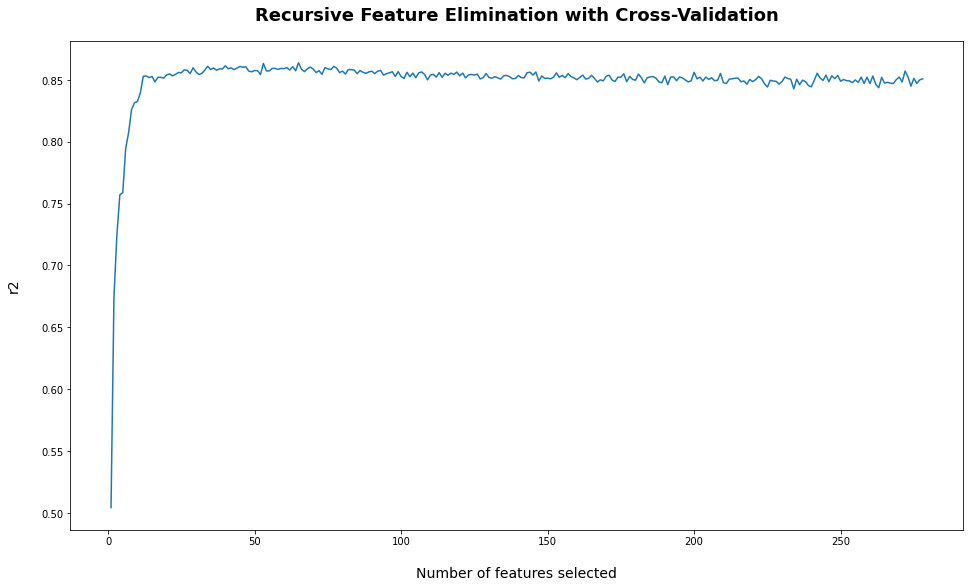

In [ ]:
 
import matplotlib.pyplot as plt 
 
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('r2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Feature Selection Result
Hasil fiter yang dileksi, dimana fitur-fitur ini yang mempunyai pengaruh baik terhadap model yang dihasilkan

In [ ]:
columnss=X.columns
feature_name = np.array(columnss)
list(feature_name[rfecv.support_])

['volume',
 'poly_electronic',
 'poly_total',
 'minimum CN_VoronoiNN',
 'mean CN_VoronoiNN',
 'min relative bond length',
 'minimum neighbor distance variation',
 'mean ordering parameter shell 3',
 'max packing efficiency',
 'maximum local difference in MeltingT',
 'range local difference in MeltingT',
 'avg_dev local difference in MeltingT',
 'minimum local difference in Column',
 'range local difference in Column',
 'maximum local difference in Electronegativity',
 'range local difference in Electronegativity',
 'avg_dev local difference in Electronegativity',
 'avg_dev local difference in NsValence',
 'maximum local difference in NdValence',
 'mean local difference in NdValence',
 'avg_dev local difference in NsUnfilled',
 'maximum local difference in NpUnfilled',
 'range local difference in NpUnfilled',
 'maximum local difference in NUnfilled',
 'range local difference in NUnfilled',
 'maximum local difference in GSbandgap',
 'range local difference in GSbandgap',
 'range local di

In [ ]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_)
# save the selected features
feature_cols_selected = list((feature_name)[rfecv.support_])
print("Features selected: " + str(feature_cols_selected))

Optimal number of features : 65
Features selected: ['volume', 'poly_electronic', 'poly_total', 'minimum CN_VoronoiNN', 'mean CN_VoronoiNN', 'min relative bond length', 'minimum neighbor distance variation', 'mean ordering parameter shell 3', 'max packing efficiency', 'maximum local difference in MeltingT', 'range local difference in MeltingT', 'avg_dev local difference in MeltingT', 'minimum local difference in Column', 'range local difference in Column', 'maximum local difference in Electronegativity', 'range local difference in Electronegativity', 'avg_dev local difference in Electronegativity', 'avg_dev local difference in NsValence', 'maximum local difference in NdValence', 'mean local difference in NdValence', 'avg_dev local difference in NsUnfilled', 'maximum local difference in NpUnfilled', 'range local difference in NpUnfilled', 'maximum local difference in NUnfilled', 'range local difference in NUnfilled', 'maximum local difference in GSbandgap', 'range local difference in GSb

# Feature Importances
Menampilkan bagaimana pengaruh fitur terhadap penentuan nilai energi bandgap. Setiap fitur memiliki kontribusi yang berbeda-beda. "frac p valence electrons" merupakan fitur yang memiliki pengaruh yang paling tinggi.

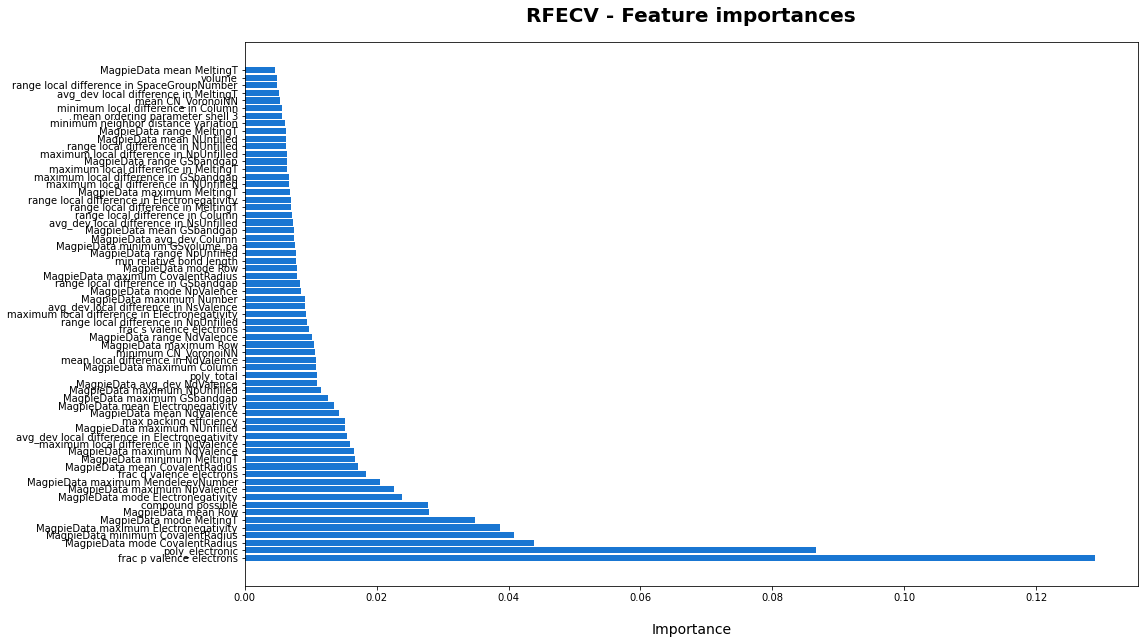

In [ ]:
dset = pd.DataFrame()
dset['attr'] = (feature_name)[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
dset

,attr,importance
62,frac p valence electrons,0.128949
1,poly_electronic,0.086643
43,MagpieData mode CovalentRadius,0.043805
40,MagpieData minimum CovalentRadius,0.040866
44,MagpieData maximum Electronegativity,0.038680
...,...,...
4,mean CN_VoronoiNN,0.005347
11,avg_dev local difference in MeltingT,0.005226
27,range local difference in SpaceGroupNumber,0.004922
0,volume,0.004879


In [ ]:
dataset = pd.read_csv('dataset_band_gap.csv')

In [ ]:
feature_selected = dataset[(feature_name)[rfecv.support_]]
target = dataset[['material_id','formula','band_gap']]
new_dataset = pd.concat([target, feature_selected], axis=1)
new_dataset

,material_id,formula,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons,compound possible
0,mp-441,Rb2Te,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.255090,10.000000,6.173657,0.255090,2.000000,1.147903e+00,1.000000,5.739515e-01,0.464000,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556,True
1,mp-22881,CdCl2,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.000000,10.000000,5.931384,0.000000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.493000,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615,True
2,mp-28013,MnI2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.000000,5.000000,2.957716,0.000000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.062000,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756,True
3,mp-567290,LaN,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.000000,0.942203,0.942203,0.000000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.064960,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,1

In [ ]:
new_dataset.shape

(1056, 68)

# Cleaning Data
Dari data yang fitur-fiturnya sudah dseleksi, kemudian akan dibersihkan, dimana baris yang mengandung NaN akan dihapus

In [ ]:
new_dataset['minimum CN_VoronoiNN'].replace('', np.nan, inplace=True)
new_dataset.dropna(subset=['minimum CN_VoronoiNN'], inplace=True)

In [ ]:
new_dataset

,material_id,formula,band_gap,volume,poly_electronic,poly_total,minimum CN_VoronoiNN,mean CN_VoronoiNN,min relative bond length,minimum neighbor distance variation,mean ordering parameter shell 3,max packing efficiency,maximum local difference in MeltingT,range local difference in MeltingT,avg_dev local difference in MeltingT,minimum local difference in Column,range local difference in Column,maximum local difference in Electronegativity,range local difference in Electronegativity,avg_dev local difference in Electronegativity,avg_dev local difference in NsValence,maximum local difference in NdValence,mean local difference in NdValence,avg_dev local difference in NsUnfilled,maximum local difference in NpUnfilled,range local difference in NpUnfilled,maximum local difference in NUnfilled,range local difference in NUnfilled,maximum local difference in GSbandgap,range local difference in GSbandgap,range local difference in SpaceGroupNumber,MagpieData maximum Number,MagpieData maximum MendeleevNumber,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData mode MeltingT,MagpieData maximum Column,MagpieData avg_dev Column,MagpieData maximum Row,MagpieData mean Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData mean CovalentRadius,MagpieData mode CovalentRadius,MagpieData maximum Electronegativity,MagpieData mean Electronegativity,MagpieData mode Electronegativity,MagpieData maximum NpValence,MagpieData mode NpValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData maximum NUnfilled,MagpieData mean NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,frac s valence electrons,frac p valence electrons,frac d valence electrons,compound possible
0,mp-441,Rb2Te,1.88,159.501208,3.44,6.23,8.000000,9.314539,0.944114,4.574309e-08,0.053132,0.510131,410.200000,2.354349e+02,1.046377e+02,6.390728,8.609272e+00,1.280000,7.346579e-01,3.265146e-01,0.255090,10.000000,6.173657,0.255090,2.000000,1.147903e+00,1.000000,5.739515e-01,0.464000,2.663135e-01,44.194265,52.0,90.0,312.46,722.66,410.20,449.193333,312.46,16.0,6.666667,5.0,5.000000,5.0,138.0,220.0,192.666667,220.0,2.10,1.246667,0.82,4.0,0.0,10.0,10.0,3.333333,4.444444,2.0,2.0,2.0,1.333333,34.763333,0.464,0.464,0.154667,0.222222,0.222222,0.555556,True
1,mp-22881,CdCl2,3.52,84.298097,3.16,6.73,6.005276,9.258333,0.833111,7.214204e-04,0.078179,0.359239,422.620000,2.579218e+02,1.146319e+02,1.948538,3.051462e+00,1.470000,8.971298e-01,3.987244e-01,0.000000,10.000000,5.931384,0.000000,1.000000,6.102924e-01,1.000000,6.102924e-01,2.493000,1.521459e+00,79.338011,48.0,94.0,171.60,594.22,422.62,312.473333,171.60,17.0,2.222222,5.0,3.666667,3.0,102.0,144.0,116.000000,102.0,3.16,2.670000,3.16,5.0,5.0,10.0,10.0,3.333333,4.444444,1.0,1.0,1.0,0.666667,19.495000,2.493,2.493,1.662000,0.230769,0.384615,0.384615,True
2,mp-28013,MnI2,1.17,108.335875,4.97,10.64,6.000000,9.189554,0.833534,4.476379e-07,0.078672,0.360542,1132.150000,6.936517e+02,3.082896e+02,3.873147,6.126853e+00,1.110000,6.800807e-01,3.022581e-01,0.000000,5.000000,2.957716,0.000000,1.000000,6.126853e-01,4.000000,2.450741e+00,1.062000,6.506718e-01,93.740856,53.0,96.0,386.85,1519.00,1132.15,764.233333,386.85,17.0,4.444444,5.0,4.666667,5.0,139.0,139.0,139.000000,139.0,2.66,2.290000,2.66,5.0,5.0,10.0,5.0,8.333333,2.222222,1.0,1.0,5.0,2.333333,10.487586,1.062,1.062,0.708000,0.146341,0.243902,0.609756,True
3,mp-567290,LaN,1.12,88.162562,7.04,17.99,5.169234,5.169234,1.000000,1.181194e-01,0.617087,0.346123,1064.642171,6.821210e-13,1.705303e-13,11.306435,5.329071e-15,1.827874,8.881784e-16,2.775558e-16,0.000000,0.942203,0.942203,0.000000,2.826609,1.332268e-15,5.653217,2.664535e-15,6.064960,1.776357e-15,0.000000,57.0,82.0,63.05,1193.00,1129.95,628.025000,63.05,1

In [ ]:
new_dataset.to_csv('dataset_band_gap_features_selected3.csv',index=False)